# Car Price Prediction::

Download dataset from this link:

https://www.kaggle.com/hellbuoy/car-price-prediction

# Problem Statement::

A Chinese automobile company Geely Auto aspires to enter the US market by setting up their manufacturing unit there and producing cars locally to give competition to their US and European counterparts.

They have contracted an automobile consulting company to understand the factors on which the pricing of cars depends. Specifically, they want to understand the factors affecting the pricing of cars in the American market, since those may be very different from the Chinese market. The company wants to know:

Which variables are significant in predicting the price of a car
How well those variables describe the price of a car
Based on various market surveys, the consulting firm has gathered a large data set of different types of cars across the America market.

# task::
We are required to model the price of cars with the available independent variables. It will be used by the management to understand how exactly the prices vary with the independent variables. They can accordingly manipulate the design of the cars, the business strategy etc. to meet certain price levels. Further, the model will be a good way for management to understand the pricing dynamics of a new market.

# WORKFLOW ::

1.Load Data

2.Check Missing Values ( If Exist ; Fill each record with mean of its feature )

3.Split into 50% Training(Samples,Labels) , 30% Test(Samples,Labels) and 20% Validation Data(Samples,Labels).

4.Model : input Layer (No. of features ), 3 hidden layers including 10,8,6 unit & Output Layer with activation function relu/tanh (check by experiment).

5.Compilation Step (Note : Its a Regression problem , select loss , metrics according to it)
6.Train the Model with Epochs (100) and validate it

7.If the model gets overfit tune your model by changing the units , No. of layers , activation function , epochs , add dropout layer or add Regularizer according to the need .

8.Evaluation Step

9.Prediction

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import seaborn as sns  ###
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense 
from tensorflow.keras.optimizers import Adam, SGD

data1 = pd.read_csv("carprice.csv")
car_data = data1.copy()
car_data

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


In [2]:
# car_data.isnull().sum()
car_data.isnull().any()

car_ID              False
symboling           False
CarName             False
fueltype            False
aspiration          False
doornumber          False
carbody             False
drivewheel          False
enginelocation      False
wheelbase           False
carlength           False
carwidth            False
carheight           False
curbweight          False
enginetype          False
cylindernumber      False
enginesize          False
fuelsystem          False
boreratio           False
stroke              False
compressionratio    False
horsepower          False
peakrpm             False
citympg             False
highwaympg          False
price               False
dtype: bool

In [3]:
car_data.dtypes

car_ID                int64
symboling             int64
CarName              object
fueltype             object
aspiration           object
doornumber           object
carbody              object
drivewheel           object
enginelocation       object
wheelbase           float64
carlength           float64
carwidth            float64
carheight           float64
curbweight            int64
enginetype           object
cylindernumber       object
enginesize            int64
fuelsystem           object
boreratio           float64
stroke              float64
compressionratio    float64
horsepower            int64
peakrpm               int64
citympg               int64
highwaympg            int64
price               float64
dtype: object

In [4]:
car_data.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

In [5]:
final_car = pd.get_dummies(car_data, columns=['symboling','CarName','fueltype',	'aspiration',	'doornumber',	'carbody',	'drivewheel',	'enginelocation',	'enginetype',	'cylindernumber',	'fuelsystem'])
final_car

,car_ID,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,...,cylindernumber_twelve,cylindernumber_two,fuelsystem_1bbl,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,1,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,...,0,0,0,0,0,0,0,1,0,0
1,2,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,...,0,0,0,0,0,0,0,1,0,0
2,3,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,...,0,0,0,0,0,0,0,1,0,0
3,4,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,...,0,0,0,0,0,0,0,1,0,0
4,5,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,109.1,188.8,68.9,55.5,2952,141,3.78,3.15,9.5,...,0,0,0,0,0,0,0,1,0,0
201,202,109.1,188.8,68.8,55.5,3049,141,3.78,3.15,8.7,...,0,0,0,0,0,0,0,1,0,0
202,203,109.1,188.8,68.9,55.5,3012,173,3.58,2.87,8.8,...,0,0,0,0,0,0,0,1,0,0
203,204,109.1,188.8,68.9,55.5,3217,145,3.01,3.40,23.0,...,0,0,0,0,0,1,0,0,0,0


In [6]:
final_car.dtypes

car_ID               int64
wheelbase          float64
carlength          float64
carwidth           float64
carheight          float64
                    ...   
fuelsystem_idi       uint8
fuelsystem_mfi       uint8
fuelsystem_mpfi      uint8
fuelsystem_spdi      uint8
fuelsystem_spfi      uint8
Length: 206, dtype: object

In [7]:
np.random.seed(11111)
data = np.random.rand(len(final_car)) < 0.72
partial_train_data = final_car[data]
x_test = final_car[~data]

In [8]:
partial_train_targets = partial_train_data.loc[:,'price']
y_test = x_test.loc[:,'price']

partial_train_data= partial_train_data.drop(columns = ['price'])
x_test= x_test.drop(columns = ['price'])

In [9]:
print('train-data',partial_train_data.shape)
print('test-data',x_test.shape)

print('train-labels',partial_train_targets.shape)
print('test-labels',y_test.shape)

train-data (141, 205)
test-data (64, 205)
train-labels (141,)
test-labels (64,)


In [10]:
########## Normalization of independent
mean = partial_train_data.iloc[:,0:13].mean(axis=0) # taking the mean of 
partial_train_data.iloc[:,0:13] -= mean
std = partial_train_data.iloc[:,0:13].std(axis=0)
partial_train_data.iloc[:,0:13] /= std

x_test.iloc[:,0:13] -= mean
x_test.iloc[:,0:13] /= std

########## Normalization of dependent
mean_label = partial_train_targets.mean()
partial_train_targets -= mean_label
std_label = partial_train_targets.std()
partial_train_targets /= std_label

y_test -= mean_label
y_test /= std_label


# Convert into Numpy Array
partial_train_data = np.array(partial_train_data.iloc[:])
x_test = np.array(x_test.iloc[:])
# Convert into dtypes
partial_train_targets= np.array(partial_train_targets.astype('float32'))
y_test= np.array(y_test.astype('float32'))

In [11]:
train = partial_train_data.copy()
train_l= partial_train_targets.copy()

In [12]:
import numpy as np
k =  4
num_val_samples = len(train) // k
num_epochs = 100
all_scores_drop = []
for i in range(k):
  print('processing fold #', i)
  val_data = train[i * num_val_samples: (i + 1) * num_val_samples]
  val_targets = train_l[i * num_val_samples: (i + 1) * num_val_samples]
  x_train = np.concatenate([train[:i * num_val_samples],train[(i + 1) * num_val_samples:]],  axis=0)
  y_train = np.concatenate([train_l[:i * num_val_samples],train_l[(i + 1) * num_val_samples:]],axis=0)

processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3


In [13]:
print('val_data',val_data.shape)
print('val_targets',val_targets.shape)

print('train-data',x_train.shape)
print('train_labels',y_train.shape)

val_data (35, 205)
val_targets (35,)
train-data (106, 205)
train_labels (106,)


In [21]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(10,activation='relu',input_shape=(partial_train_data.shape[1],)),
    tf.keras.layers.Dense(8,activation='relu'),
    tf.keras.layers.Dense(6,activation='relu'),       
    tf.keras.layers.Dense(1)])### tanh hyperbolic tangent range--1 to 1  similar to sigmoid     
model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
# model.compile(Adam(lr=0.8)

In [22]:
# verbose=0
history = model.fit(x_train, y_train,batch_size=1,epochs=80)
#validation_data=(x_val, y_val)


Epoch 1/80
106/106 [==============================] - 0s 722us/step - loss: 1.3623 - mae: 0.8826
Epoch 2/80
106/106 [==============================] - 0s 756us/step - loss: 1.2508 - mae: 0.8000
Epoch 3/80
106/106 [==============================] - 0s 778us/step - loss: 0.4496 - mae: 0.4712
Epoch 4/80
106/106 [==============================] - 0s 768us/step - loss: 0.2110 - mae: 0.2978
Epoch 5/80
106/106 [==============================] - 0s 785us/step - loss: 0.1860 - mae: 0.2763
Epoch 6/80
106/106 [==============================] - 0s 782us/step - loss: 0.2446 - mae: 0.3120
Epoch 7/80
106/106 [==============================] - 0s 791us/step - loss: 0.1257 - mae: 0.2564
Epoch 8/80
106/106 [==============================] - 0s 794us/step - loss: 0.1152 - mae: 0.2423
Epoch 9/80
106/106 [==============================] - 0s 823us/step - loss: 0.0893 - mae: 0.2055
Epoch 10/80
106/106 [==============================] - 0s 728us/step - loss: 0.0996 - mae: 0.2076
Epoch 11/80
106/106 [========

In [23]:
val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0)

In [31]:
print('mean-square-error',val_mse)
print()
print('mean-absolue-error',val_mae)

mean-square-error 0.21202705800533295

mean-absolue-error 0.3084525167942047


In [24]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 10)                2060      
_________________________________________________________________
dense_5 (Dense)              (None, 8)                 88        
_________________________________________________________________
dense_6 (Dense)              (None, 6)                 54        
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 7         
Total params: 2,209
Trainable params: 2,209
Non-trainable params: 0
_________________________________________________________________


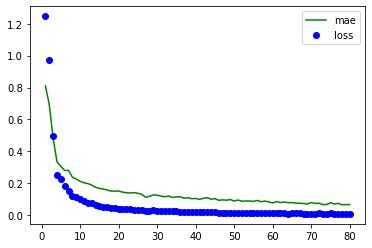

In [32]:
import matplotlib.pyplot as plt
history_dict = history.history

val = history_dict['mae']
val2 = history_dict['loss']

epochs = range(1, len(val) + 1)
plt.plot(epochs, val, 'green', label='mae')
plt.plot(epochs, val2, 'bo', label='loss')
plt.legend()
plt.show()

In [26]:
# predicting the test set results
y_pred = model.predict(x_test)

In [27]:
y_pred

array([[ 0.4952283 ],
       [ 0.5933836 ],
       [ 1.2373934 ],
       [ 2.6370792 ],
       [-1.1835506 ],
       [-0.8062163 ],
       [-0.3862099 ],
       [-0.85482734],
       [-0.8285103 ],
       [-0.59435767],
       [-0.07289439],
       [-0.5168161 ],
       [-0.8306568 ],
       [-0.9063402 ],
       [-0.63474387],
       [-0.6394601 ],
       [ 0.17686325],
       [ 2.0722299 ],
       [ 2.861321  ],
       [ 3.2449946 ],
       [-0.862069  ],
       [-0.29614964],
       [-0.25854006],
       [-0.5432268 ],
       [-0.18722308],
       [-0.7194744 ],
       [-0.8835953 ],
       [-0.7606037 ],
       [ 0.2660629 ],
       [ 0.06413949],
       [ 0.6595443 ],
       [ 0.39206445],
       [ 0.49050927],
       [ 0.12964106],
       [ 0.17691135],
       [ 0.14597186],
       [ 2.6835198 ],
       [ 3.33684   ],
       [-0.33197024],
       [-0.3291211 ],
       [ 0.27737522],
       [-0.65075237],
       [-0.65134156],
       [-0.6393689 ],
       [-0.94168717],
       [-0